In [ ]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1Ct_qE2N8T0H0ZI75d12tJCvYTEpLHiooU57CvNozq0E/edit").worksheet("Form Responses 1")

# Convert to pandas DataFrame
data = sheet.get_all_records()
df = pd.DataFrame(data)

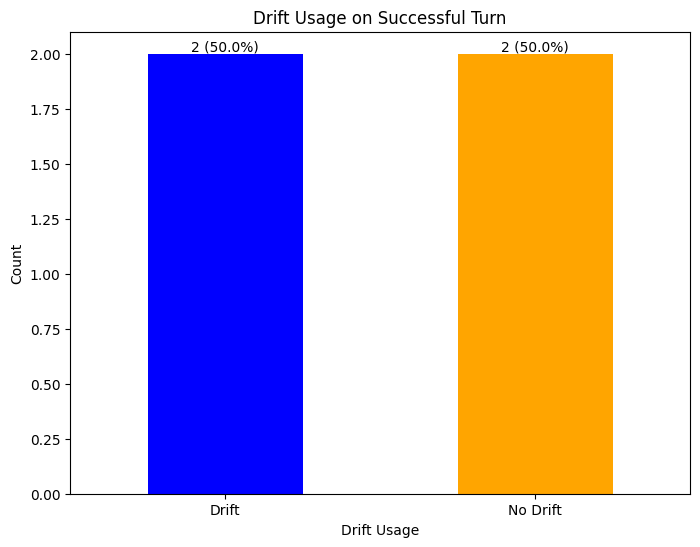

In [ ]:
#Turn With/Without drift

df['driftUsedInTurnEntry_category'] = df['driftUsedInTurnEntry'].apply(lambda x: 'Drift' if x == 'TRUE' else 'No Drift')

segment_counts = df['driftUsedInTurnEntry_category'].value_counts()
total = segment_counts.sum()

plt.figure(figsize=(8, 6))
ax = segment_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Drift Usage on Successful Turn')
plt.xlabel('Drift Usage')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    count = int(p.get_height())
    percent = count / total * 100
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{count} ({percent:.1f}%)',
            ha='center', va='bottom', fontsize=10)

plt.show()

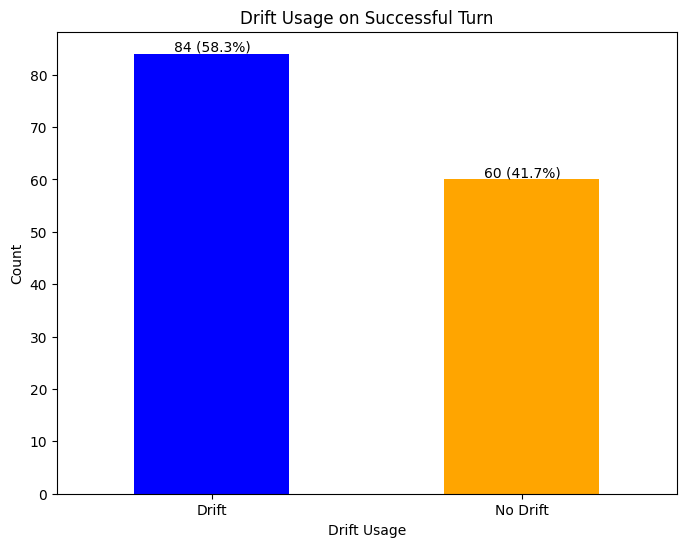

In [ ]:
## MOCKUP, TODELETE
segment_counts = pd.Series({
    'Drift': 84,
    'No Drift': 60
})
total = segment_counts.sum()

plt.figure(figsize=(8, 6))
ax = segment_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Drift Usage on Successful Turn')
plt.xlabel('Drift Usage')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    count = int(p.get_height())
    percent = count / total * 100
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{count} ({percent:.1f}%)',
            ha='center', va='bottom', fontsize=10)

plt.show()